# Assignment B1
Problem Statement: Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location.Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
%pip install seaborn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Dataset Description:
1. key - a unique identifier for each trip
2. fare_amount - the cost of each trip in usd
3. pickup_datetime - date and time when the meter was engaged
4. passenger_count - the number of passengers in the vehicle (driver entered value)
5. pickup_longitude - the longitude where the meter was engaged
6. pickup_latitude - the latitude where the meter was engaged
7. dropoff_longitude - the longitude where the meter was disengaged
8. dropoff_latitude - the latitude where the meter was disengaged

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Preprocessing
Steps:
1. Remove null values
2. Remove invalid columns
3. Remove rows with fare<=0
4. Remove rows with passengers >6
5. Remove data with invalid latitudes or longitudes

In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df = df.dropna()
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [5]:
df[df['fare_amount'].values <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
20744,0.00,2015-04-22 23:25:07 UTC,-73.658897,40.805199,-73.658897,40.805199,1
22182,0.00,2010-03-20 02:59:51 UTC,-73.994366,40.755395,-73.998718,40.854853,2
63395,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1
71246,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2
79903,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1
87467,0.00,2015-01-04 03:51:13 UTC,-73.969475,40.807503,0.000000,0.000000,2
89322,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5
92063,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3
98875,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5
104080,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1


In [6]:
df.drop(df[df['fare_amount'].values <= 0].index  , inplace= True)
df.shape

(199977, 7)

In [7]:
df[df['passenger_count'] >6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [8]:
df.drop(df[df['passenger_count'] >6].index, inplace=True)
df.shape

(199976, 7)

In [10]:
def filter_latitude(val):
    if val < -90 or val > 90:
        return np.nan
    else:
        return val

def filter_longitude(val):
    if val < -180 or val > 180:
        return np.nan
    else:
        return val

In [11]:
df['pickup_longitude'] = df['pickup_longitude'].apply(filter_longitude)
df['pickup_latitude'] = df['pickup_latitude'].apply(filter_latitude)
df['dropoff_longitude'] = df['dropoff_longitude'].apply(filter_longitude)
df['dropoff_latitude'] = df['dropoff_latitude'].apply(filter_latitude)

In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     7
pickup_latitude      4
dropoff_longitude    3
dropoff_latitude     3
passenger_count      0
dtype: int64

In [13]:
df.dropna(inplace=True)

## Outlier detection
Using IQR range

In [14]:
Q1 = np.percentile(df['fare_amount'], 25)
Q2 = np.percentile(df['fare_amount'], 50)
Q3 = np.percentile(df['fare_amount'], 75)

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  6.0
Q1 50 percentile of the given data is,  8.5
Q1 75 percentile of the given data is,  12.5
Interquartile range is 6.5


In [15]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)


low_limit is -3.75
up_limit is 22.25


In [16]:
outlier =[]
for x in df['fare_amount']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Number of outliers: ',len(outlier))

Number of outliers:  17154


In [17]:
outlier_df = df[df['fare_amount'].isin(outlier)]
outlier_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
6,24.50,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
30,25.70,2011-05-21 09:00:00 UTC,-73.944815,40.834367,-73.989332,40.721920,4
34,39.50,2014-06-04 06:49:00 UTC,-73.788080,40.642187,-73.865042,40.725997,4
39,29.00,2014-02-13 17:57:00 UTC,-73.992600,40.753172,-73.908508,40.816192,1
48,56.80,2013-01-03 22:24:41 UTC,-73.993498,40.764686,-73.993498,40.764686,1
...,...,...,...,...,...,...,...
199976,49.70,2011-10-18 23:53:00 UTC,-73.978225,40.783318,-73.700963,40.705852,1
199977,43.50,2012-11-20 21:04:30 UTC,-73.996671,40.737483,-73.867758,40.897563,1
199982,57.33,2014-08-06 11:06:06 UTC,-73.969204,40.754771,-73.790351,40.643802,1
199985,24.00,2015-04-18 15:16:06 UTC,-74.005089,40.737301,-73.945290,40.774162,5


## Correlation analysis

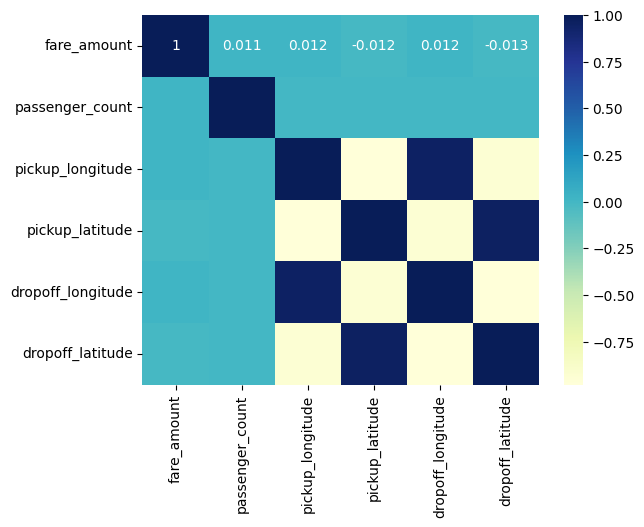

In [18]:
df_corr = df[['fare_amount','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
dataplot = sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True)

## Linear Regression

In [19]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'] )

In [20]:
df['day'] = df['pickup_datetime'].dt.day_name()
df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month_name()
df['year'] = df['pickup_datetime'].dt.year
df['hour'] = df['pickup_datetime'].dt.hour

df.drop('pickup_datetime', axis=1, inplace=True) 

In [21]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [23]:
cat_cols = x_train.select_dtypes(include='O').columns.tolist()
num_cols = x_train.select_dtypes(exclude='O').columns.tolist()

In [24]:
from sklearn.preprocessing import  RobustScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps = [
    ('scaler' , RobustScaler())
])

#preprocessing for categorical data 
categorical_transformer = Pipeline(steps=[
    ('enc',OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessing = ColumnTransformer(
    transformers=[
        ('num' , numerical_transformer , num_cols),
        ('cat',categorical_transformer ,cat_cols)
    ]

)

In [25]:
x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

In [26]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(x_test)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 9.62620871574447
R2: 0.01659440247837185


## Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = rf.predict(x_test)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 4.394234564764171
R2: 0.7950779932863865
